In [14]:
from malab import *
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *
import os, sys
from tabulate import tabulate

## prepare folder and file

In [22]:
expt_name = 'TestExp'
print('Experiment name: ' + expt_name)

expt_path = os.getcwd() 
print("Current working dir : %s" % expt_path)

if not os.path.exists('data'):
    os.makedirs('data')
data_path = expt_path + '\\data'

fname = get_next_filename(data_path, expt_name, suffix='.h5')
print('Current data file: ' + fname)

Experiment name: TestExp
Current working dir : C:\Users\e_hea\Dropbox\Alex_MaLabDropbox\Python\_malab_test_dir
Current data file: 00007_TestExp.h5


## create and save data

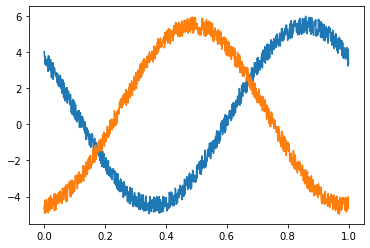

In [7]:
fake_freq = linspace(0,1,1001)
fake_mag = 5* sin(fake_freq*2*pi+10*random.rand()) + random.rand(len(fake_freq))
fake_phase = 5* sin(fake_freq*2*pi+10*random.rand()) + random.rand(len(fake_freq))

plot(fake_freq, fake_mag, fake_freq, fake_phase)

In [12]:
with SlabFile(data_path + '\\'+ fname, 'a') as f:
    
    # 'a': read/write/create

    f.append('freqs',fake_freq)
    f.append('mags', fake_mag)
    f.append('phases', fake_phase)
    
    f.note('this is a timed note')

    # f.add('freqs',fake_freq)
    # f.add('mags', fake_mag)
    # f.add('phases', fake_phase)
    
    # append will append to existing data, add will replace exisitng data.
    # note the different dimensions between the two methods

### post_run function and save figure

## load data from file

In [20]:
data_path = data_path
fname = fname

with SlabFile(data_path + '\\'+ fname, 'r') as f:
    
    # 'r': read only
    print(data_path)
    print(fname)
    print(tabulate(list(f.items())))
        
    freqs = array(f['freqs'])
    mags = array(f['mags'])
    phases = array(f['phases'])
    
    note = f.get_notes()

C:\Users\e_hea\Dropbox\Alex_MaLabDropbox\Python\_malab_test_dir\data
00006_TestExp.h5
------  ----------------------------------------------------
freqs   <HDF5 dataset "freqs": shape (5, 1001), type "<f8">
mags    <HDF5 dataset "mags": shape (5, 1001), type "<f8">
notes   <HDF5 dataset "notes": shape (3,), type "|O">
phases  <HDF5 dataset "phases": shape (5, 1001), type "<f8">
------  ----------------------------------------------------


In [17]:
note

['2021-03-26 17:44:31.885763 -- this is a note',
 '2021-03-26 17:45:45.152336 -- this is a note',
 '2021-03-26 17:46:02.276888 -- this is a timed note']

## save and load config file into h5